<a href="https://colab.research.google.com/github/mfdali/BootcampDataAnalytics/blob/main/Statistics_Probability_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Statistics with Python - Probability and distribution
Author: Monique Dali @mfdali

Bootcamp challenge @WoMakersCode

You are a researcher developing an analysis on the characteristics of the workforce in Brazil.

* Goal: Calculate probability of an event happening.

* Dataset: 6 columns, 4 categorical and 2 numeric. The dataset consists of 1000 entries, with each entry representing one individual.

* Column labels:

  [EN] state, age, education level, english level, income, gender

  [PT] estado	idade	escolaridade	nível de proficiência em inglês	renda	sexo

* Data file: populacao_brasileira.csv

##  Import libraries




In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# statistics
import scipy.stats as stat

In [ ]:
# Desativando todas as mensagens de aviso
import warnings
warnings.filterwarnings("ignore")

## Load data

In [ ]:
# Read the dataset into a pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/mfdali/BootcampDataAnalytics/main/data/populacao_brasileira.csv',index_col=0)

In [ ]:
# Check dataframe
df.head()

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M


## Data exploration

In [ ]:
# dataset size
df.shape

(1000, 6)

In [ ]:
# Check data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   estado                           1000 non-null   object 
 1   idade                            1000 non-null   int64  
 2   escolaridade                     1000 non-null   object 
 3   nível de proficiência em inglês  1000 non-null   object 
 4   renda                            1000 non-null   float64
 5   sexo                             1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 54.7+ KB


In [ ]:
# Checking for missing values
df.isnull().sum()

estado                             0
idade                              0
escolaridade                       0
nível de proficiência em inglês    0
renda                              0
sexo                               0
dtype: int64

In [ ]:
# Summary statistics of numerical columns
df.describe()

,idade,renda
count,1000.000000,1000.000000
mean,40.986000,3082.537180
std,13.497852,996.572239
min,18.000000,103.740000
25%,29.000000,2425.815000
50%,42.000000,3076.415000
75%,52.000000,3714.487500
max,64.000000,5632.380000


In [ ]:
# Summary statistics of categorical columns
df.describe(include=['object'])

,estado,escolaridade,nível de proficiência em inglês,sexo
count,1000,1000,1000,1000
unique,27,4,3,2
top,AP,Fundamental,Avançado,F
freq,48,266,344,514


idade       Axes(0.125,0.53;0.168478x0.35)
renda    Axes(0.327174,0.53;0.168478x0.35)
dtype: object

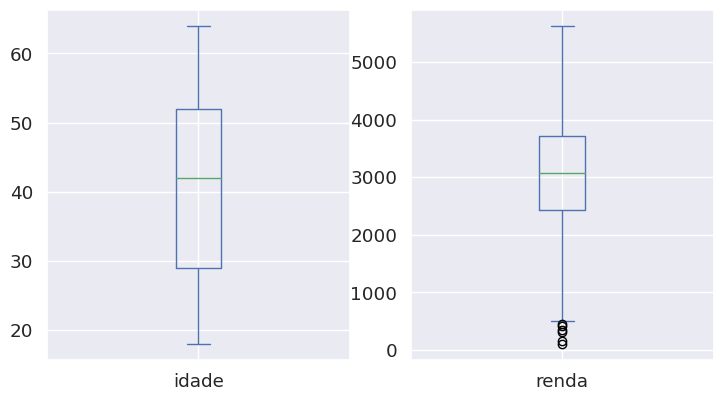

In [ ]:
# Create boxplots
df.plot(kind = 'box', subplots = True, layout = (2,4), sharex = False, sharey = False, figsize = (18,10))

In [ ]:
def plot_bars(df,hue_groups=None):
  plt.rcParams['figure.figsize'] = [4, 8]
  sns.set_theme()
  sns.set(font_scale=1.2)

  # create histplots
  for column in df.select_dtypes(include='object').columns:
      plt.figure(figsize=(8, 4))
      table = df[column].value_counts().sort_values(ascending=False)
      sns_plot = sns.barplot(x = table.index, y = table.values, palette='viridis')

      # labels appear outside of plot area, so auto-adjust
      sns_plot.figure.tight_layout()
      plt.title('Frequency by ' + column)
      plt.xlabel(column)
      plt.ylabel('Frequency')
      plt.xticks(rotation=45)
      plt.grid(axis='y', linestyle='--', alpha=0.7)
      plt.show()

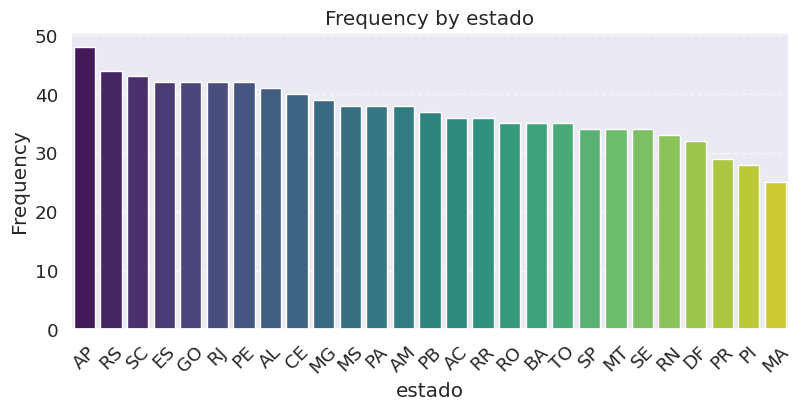

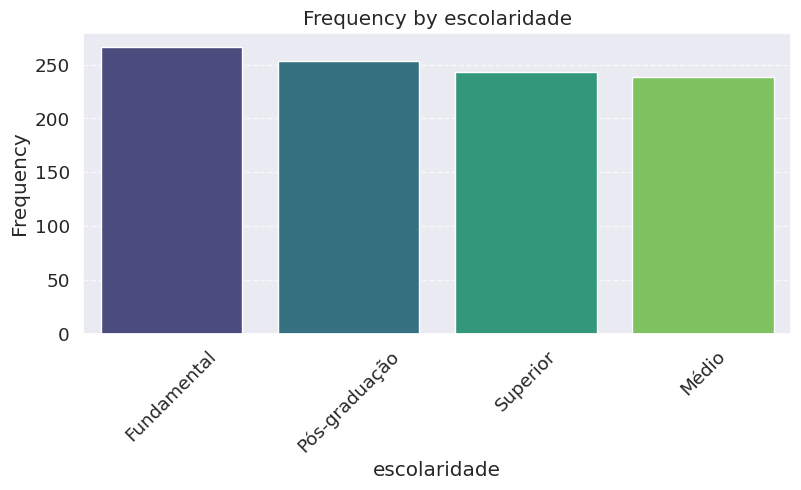

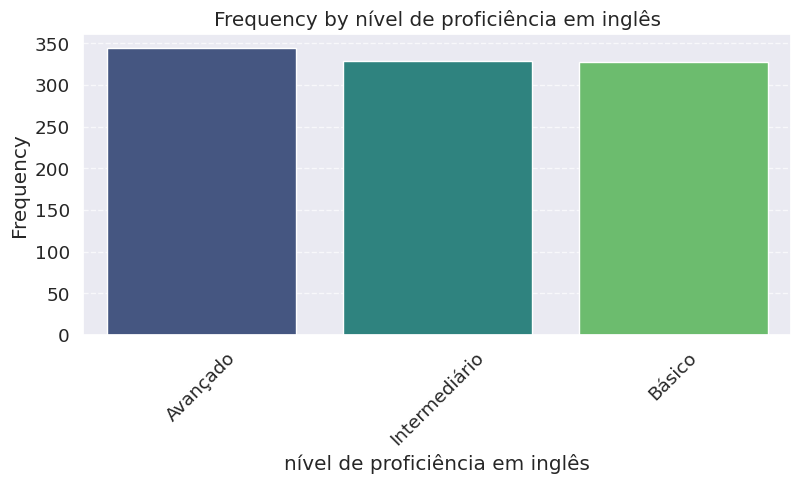

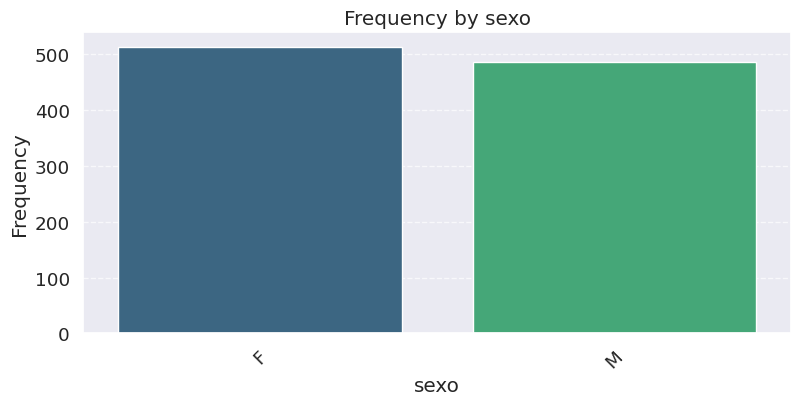

In [ ]:
plot_bars(df)

In [ ]:
def plot_histogram(df,limits=False,hue_groups=None):
  plt.rcParams['figure.figsize'] = [4, 8]
  sns.set_theme()
  sns.set(font_scale=1.2)

  # create histplots
  for column in df.select_dtypes(include=np.number).columns:
      plt.figure(figsize=(8, 4))
      sns_plot = sns.histplot(data = df , x = column, kde= True,stat="density",hue=hue_groups, color = "darkseagreen", palette = 'viridis')


      # labels appear outside of plot area, so auto-adjust
      sns_plot.figure.tight_layout()
      plt.title("Histogram: "+column)

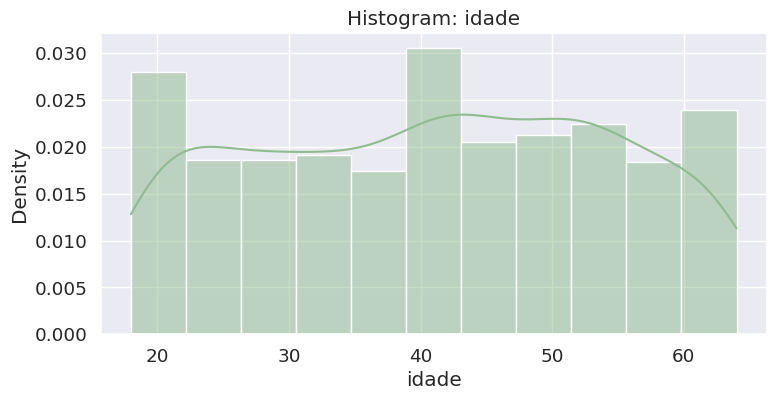

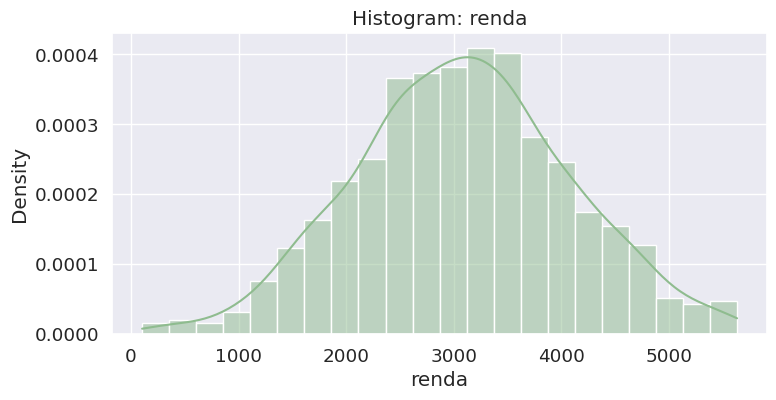

In [ ]:
# Plot histogram
plot_histogram(df)

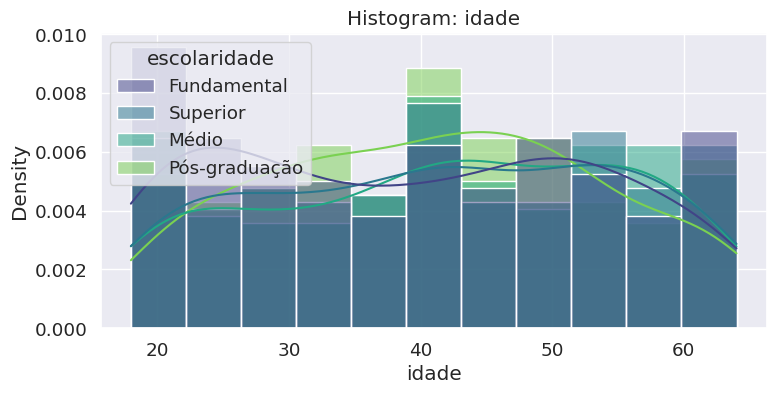

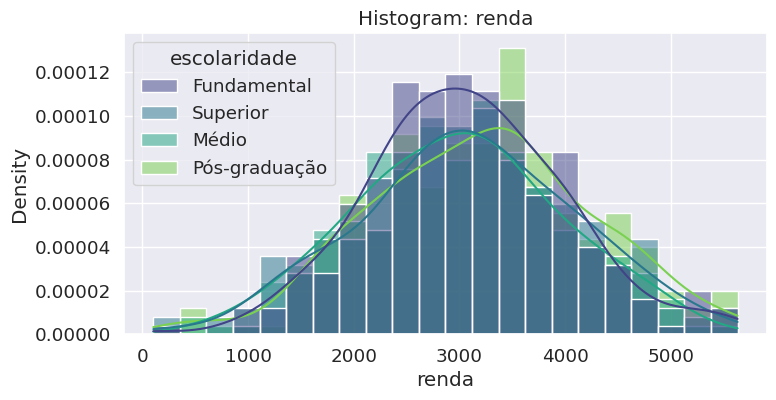

In [ ]:
# Plot histogram
plot_histogram(df,hue_groups='escolaridade')

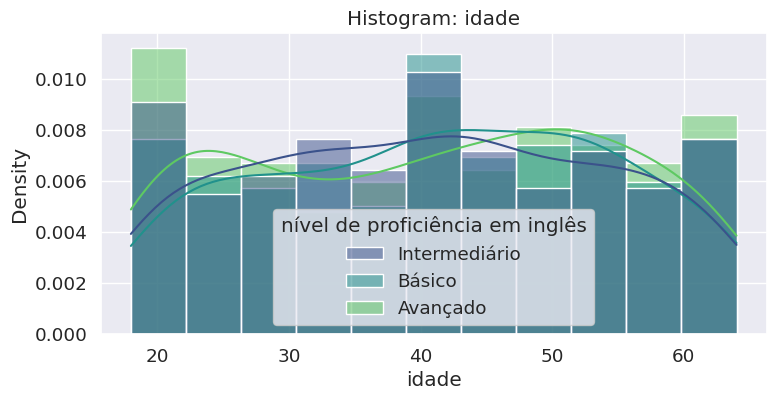

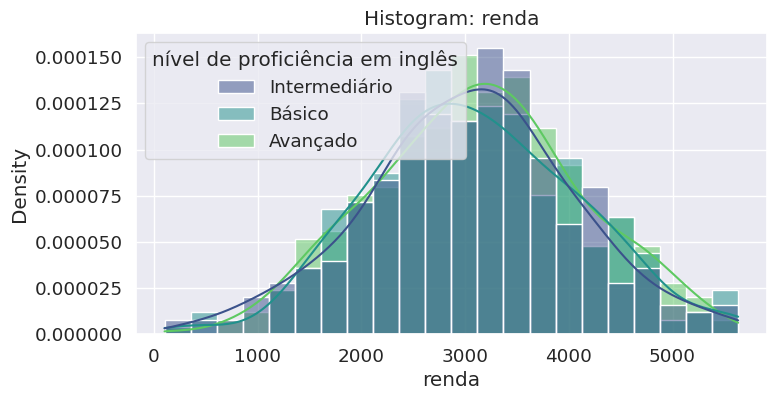

In [ ]:
# Plot histogram
plot_histogram(df,hue_groups='nível de proficiência em inglês')

## Data analysis: Probability

**Problem:**

Imagine that you are a researcher developing an analysis on the characteristics of the workforce in Brazil.

**Questions**

###1 - Consider people fluent in English, what is the complementary probability?

In other words, what is the probability of randomly choosing a person and they not being fluent in English? Consider fluent those with an advanced level.

P(X = x) = $\frac{n_i}{N}$

Complementary probability = 1-P(X)

In [ ]:
# Get sample size
n = df.shape[0]
# Get only advanced english level individuals
frequency = len(df[df['nível de proficiência em inglês'] == 'Avançado'])

In [ ]:
# Calculate probability
adv_english_probability = frequency/n

In [ ]:
# Calculate coplementary probability
complementary_adv_prob = 1 - adv_english_probability

In [ ]:
# Show answer
print("Probability of find a not fluent person: %.2f %%\n" % (complementary_adv_prob*100))

Probability of find a not fluent person: 65.60 %



###2 - If a person randomly chosen is from Alagoas or Pará, what is the probability of them having an income exceeding 5 thousand reais?

In [ ]:
# Show states
df['estado'].unique()

array(['MA', 'BA', 'AM', 'CE', 'SE', 'DF', 'PI', 'AP', 'AC', 'SC', 'SP',
       'GO', 'RO', 'PA', 'MS', 'RN', 'RS', 'RR', 'PR', 'MG', 'MT', 'TO',
       'PB', 'PE', 'RJ', 'AL', 'ES'], dtype=object)

In [ ]:
# Filter dataset using conditions
AL_PA_filter = df[(df['estado'] == 'AL') | (df['estado'] == 'PA')]

In [ ]:
# Get sample size
AL_PA_n = len(AL_PA_filter)
# Get only advanced english level individuals
income_AL_PA_frequency = len(AL_PA_filter[AL_PA_filter['renda'] > 5000])

In [ ]:
# Calculate probability
income_state_prob = income_AL_PA_frequency/AL_PA_n

In [ ]:
# Show answer
print("Probability to find a person that lives in Alagoas or Para with income greater than R$ 5000: %.2f %%\n" % (income_state_prob*100))

Probability to find a person lives in Alagoas or Para with income greater than R$ 5000: 5.06 %



###3 - Find out the probability of a person having completed higher education in the state of Amazonas.

What is the probability that the fifth person you talk to, who is from Amazonas, has completed higher education?

I will consider people with higher eduction those who completed college or graduate programs.

In [ ]:
# Number of attemps
k_education_AM = 5

In [ ]:
# Level of education
df['escolaridade'].unique()

array(['Fundamental', 'Superior', 'Médio', 'Pós-graduação'], dtype=object)

In [ ]:
# Filter dataset using conditions
AM_filter = df[(df['estado'] == 'AM')]

In [ ]:
# Get sample size
AM_n = AM_filter.shape[0]
# Get higher education individuals (college + post-graduate)
education_AM_frequency = len(AM_filter[(AM_filter['escolaridade'] == 'Superior') | (AM_filter['escolaridade'] == 'Pós-graduação')])

In [ ]:
# Calculate probability to find person with higher education
education_AM_prob = education_AM_frequency/AM_n

In [ ]:
# Calculate probability to not find person with higher education
education_AM_comp = 1 - education_AM_prob

In [ ]:
# Show answer
print("Probability of a person has completed higher education in the state of Amazonas.: %.2f %%\n" % (education_AM_prob*100))

Probability of a person has completed higher education in the state of Amazonas.: 55.26 %



Fail 4 times and then success in the fifth draw
xxxxo

Probability xxxo= $(1-p)^{k_{events}-1} * p $

In [ ]:
# Calculate combined probability
education_AM_n_5 = pow(education_AM_comp,(k_education_AM-1))*education_AM_prob

In [ ]:
# Show answer
print("Probability that the fifth person has completed higher education in the state of Amazonas: %.2f %%\n" % (education_AM_n_5*100))

Probability that the fifth person has completed higher education in the state of Amazonas: 2.21 %



Geometric distribution
 - Fail until success

In [ ]:
# Calculate probability using geometric function
education_AM_n_5_prob_func = stat.geom.pmf(k_education_AM,education_AM_prob)

In [ ]:
 # Check answer
print("Geometric function probability : %.2f %%\n" % (education_AM_n_5_prob_func*100))

Geometric function probability : 2.21 %



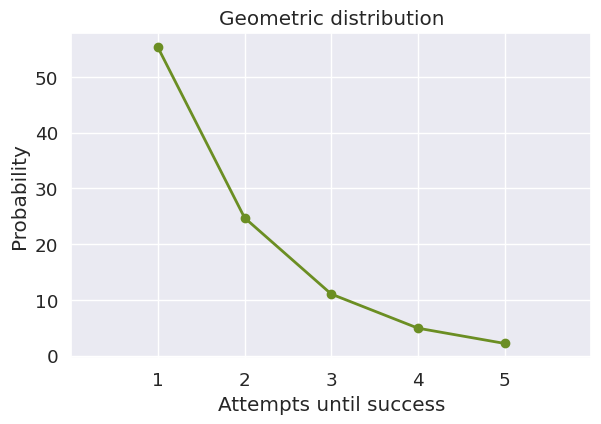

In [ ]:
# plot probability distribution
k = np.arange(1, int(k_education_AM)+1)
p = stat.geom.pmf(k, education_AM_prob)
plt.figure(figsize=(6, 4))
plt.plot(k,(p*100), color = "olivedrab", linewidth=2, marker='o')

# Adjust plot
plt.tight_layout()
plt.title('Geometric distribution')
plt.xlabel('Attempts until success')
plt.ylabel('Probability')
plt.xlim([0,max(k+1)])
plt.xticks(k)
plt.grid('on')
plt.show()

###4 - Considering the income of the people in our sample, can we say that the income of a Brazilian person is mostly in which range (make a range of 1,500 BRL)? What is its probability density function?

In [ ]:
# Choose column
column = 'renda'

# Create lanes
lanes = [*range(0,round(df['renda'].max()),1500)]
lanes.append((lanes[-1]+1500))

In [ ]:
#Show list
lanes

[0, 1500, 3000, 4500, 6000]

In [ ]:
# Group income lanes
count_income = np.zeros(len(lanes)-1)
count_income[0] = len(df[df['renda']<lanes[1]])
count_income[1] = len(df[(df['renda']>=lanes[1]) & (df['renda']<lanes[2])])
count_income[2] = len(df[(df['renda']>=lanes[2]) & (df['renda']<lanes[3])])
count_income[3] = len(df[(df['renda']>=lanes[3])])

In [ ]:
# Frequency by income lane
count_income

array([ 55., 414., 442.,  89.])

In [ ]:
# Check sum
count_income.sum()

1000.0

In [ ]:
# Calculate probability for income range
income_prob = []
for i in range(len(count_income)):
  income_prob.append(count_income[i]/n)

In [ ]:
# Highest frequency
lane_loc = np.argmax(count_income)

In [ ]:
# Show answer
print("The highest probability is %.2f %% in the lane %g between %g and %g\n" % ((income_prob[lane_loc]*100),(lane_loc+1),lanes[lane_loc],lanes[lane_loc+1]))

The highest probability is 44.20 % in the lane 3 between 3000 and 4500



###5 - Calculate the mean and variance of the sample income. Then create the normal distribution, including the graph.

In [ ]:
# Mean
income_mu = df['renda'].mean()

In [ ]:
# Variance
income_sigma = df['renda'].var()

In [ ]:
# Income standard deviation
income_std = df['renda'].std()

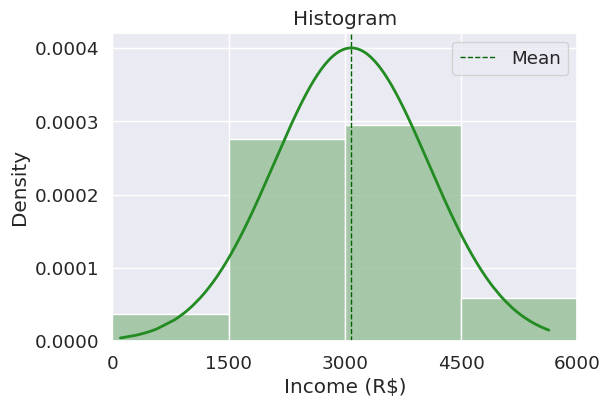

Income
 Mean(μ): R$ 3082.54
 Variance(σ²): 993156.23
 Standard deviation(σ): 996.57



In [ ]:
# Create histogram plot
plt.figure(figsize=(6, 4))
sns.histplot(data = df , x = column, color = "darkseagreen", binwidth=1500, stat = "density", binrange=[0,lanes[-1]])
plt.axvline(income_mu, color='darkgreen', linestyle='dashed', linewidth=1, label='Mean')

# Plot probability density function
x = df['renda'].sort_values().values # get and sort sample income
p = stat.norm.pdf(x,income_mu,income_std) #normal probability density function
plt.plot(x, p, color='forestgreen', linewidth=2)

# Adjust plot
plt.title("Histogram")
plt.xlabel("Income (R$)")
plt.legend()
plt.xlim([0,df['renda'].max()])
plt.xticks(lanes)
plt.grid('on')
plt.show()

# Show answer
print("Income\n Mean(\u03BC): R$ %.2f\n Variance(\u03C3²): %.2f\n Standard deviation(\u03C3): %.2f\n" % (income_mu,income_sigma,income_std))

###6 - First consider the probability found in our set of people with postgraduate education.

Considering the sample of the Brazilian population with 1 million inhabitants, what is the probability of finding 243 thousand people with postgraduate education?

Binomial probability

In [ ]:
# Get individuals with post-graduate education
graduate_frequency = len(df[(df['escolaridade'] == 'Pós-graduação')])

In [ ]:
# Calculate probability
graduate_prob = graduate_frequency/len(df)

In [ ]:
# Show answer
print("Probability of a person has completed graduate education in the sample: %.2f %%\n" % (graduate_prob*100))

Probability of a person has completed graduate education in the sample: 25.30 %



In [ ]:
# Population
N = int(1E+6)
# Win case
k_win = int(243000)

In [ ]:
# Calculate the probability using the binomial distribution
graduate_subsample_prob = stat.binom.pmf(k_win, N, graduate_prob)

In [ ]:
# Show answer
print("Probability to find 243 thousand people with graduate education in the population: %e \n" % (graduate_subsample_prob))

Probability to find 243 thousand people with graduate education in the population: 1.110485e-119 



###7 - By adding the densities, we have the cumulative density function.

Considering the column 'Education', create the discrete cumulative density function for each level of education.

In [ ]:
# Create education level list
education_level_list = ['Fundamental', 'Médio', 'Superior', 'Pós-graduação']

In [ ]:
# Count people by level of education
count_education = np.zeros(len(education_level_list))
for i in range(len(count_education)):
  count_education[i] = len(df[df['escolaridade']==education_level_list[i]])

In [ ]:
# Calculate probability by level of education
education_level_prob = []
for i in range(len(count_education)):
  education_level_prob.append(count_education[i]/sum(count_education))

In [ ]:
# Calculate cumulative probability by level of education
education_level_cumprob = []
tot = 0
for i in range(len(education_level_prob)):
  tot += education_level_prob[i]
  education_level_cumprob.append(tot*100)

In [ ]:
# Show cumulative probability
print("Level of education cumulative probability: \n")
for i in range(len(education_level_cumprob)):
  # Show answer
  print("%s: %.2f %%\n" % (education_level_list[i],education_level_cumprob[i]))

Level of education cumulative probability: 

Fundamental: 26.60 %

Médio: 50.40 %

Superior: 74.70 %

Pós-graduação: 100.00 %



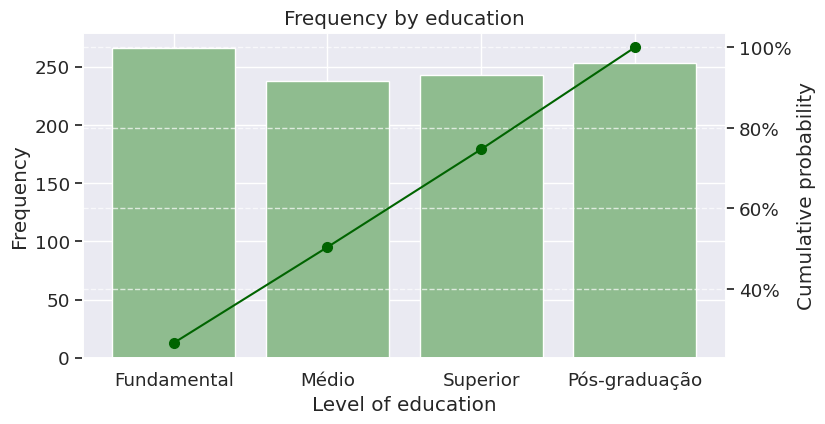

In [ ]:
# Plot bars and cumulative probability line
from matplotlib.ticker import PercentFormatter

# Create barplot
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(education_level_list, count_education, color="darkseagreen")
# Set secondary axis
ax2 = ax.twinx()
# Create line plot
ax2.plot(education_level_list, education_level_cumprob, color="darkgreen", marker="o", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

# adjust plot
fig.tight_layout()
plt.title('Frequency by education')
ax.set_xlabel('Level of education')
ax.set_ylabel('Frequency')
ax2.set_ylabel('Cumulative probability')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###8 - What is the sampling error margin of the population proportion considering the proportion of people with intermediate English level?

In [ ]:
df['nível de proficiência em inglês'].unique()

array(['Intermediário', 'Básico', 'Avançado'], dtype=object)

In [ ]:
# Get individuals with intermediate english level
intermediate_frequency = len(df[(df['nível de proficiência em inglês'] == 'Intermediário')])

In [ ]:
# Calculate probability
intermediate_prob = intermediate_frequency/len(df)

In [ ]:
# Calculate complementary probability
intermediate_comprob = 1 - intermediate_prob

In [ ]:
# Show answer
print("Probability of intermediate english level in the sample: %.2f %%\n" % (intermediate_prob*100))

Probability of intermediate english level in the sample: 32.90 %



In [ ]:
# 95% confidence interval
CI = 0.95
# Calculate the z-score
z_score = stat.norm.ppf(1 - (1 - CI) / 2)

`Z * np.sqrt((p * (1 - p)) / n)`

In [ ]:
# Margin of error
moe = z_score * np.sqrt((intermediate_prob*intermediate_comprob)/len(df))

In [ ]:
# Show answer
print("margin of error intermediate english level: %.2f %%\n" % (moe*100))

margin of error intermediate english level: 2.91 %



###9 - Calculate the income of the population.
What is the probability of finding 60 people with an income one thousand reais higher than the mean?

In [ ]:
# Sample size
income_n2 = 60

In [ ]:
# Income mean
income_mu

3082.5371800000003

In [ ]:
# Income standard deviation
income_std

In [ ]:
# desired income
income_lane = income_mu + 1000

In [ ]:
# Count people with income higher than mean + 1000
query_income_freq = len(df[df['renda'] >= income_lane])

In [ ]:
# Calculate probability
query_income_prob = query_income_freq/len(df)

In [ ]:
# Show answer
print("Probability of a person with an income one thousand reais higher than the mean: %.2f %%\n" % (query_income_prob*100))

Probability of a person with an income one thousand reais higher than the mean: 16.10 %



In [ ]:
# Calculate probability with binomial function
income_60_people_prob_func = stat.binom.pmf(income_n2,len(df),query_income_prob)

In [ ]:
# Show answer
print("Probability of finding 60 people with income one thousand BRL higher than the mean in the sample: %e \n" % (income_60_people_prob_func))

Probability of finding 60 people with income one thousand BRL higher than the mean in the sample: 1.099521e-22 



###10 - What is the probability of choosing someone from the Southeast who is male, with elementary education, and with an income greater than 2 thousand BRL reais per month?

Frequency

In [ ]:
# Get southeast states
southeast_frequency = len(df[(df['estado'] == 'RJ') | (df['estado'] == 'ES') | (df['estado'] == 'MG') | (df['estado'] == 'SP')])

In [ ]:
# Get gender
gender_frequency = len(df[(df['sexo'] == 'M')])

In [ ]:
# Get education
elementary_frequency = len(df[(df['escolaridade'] == 'Fundamental')])

In [ ]:
# Get income lane
income_2000_frequency = len(df[(df['renda'] > 2000) ])

Probability

In [ ]:
# Calculate state probability
southeast_prob = southeast_frequency/len(df)

In [ ]:
# Calculate gender probability
gender_prob = gender_frequency/len(df)

In [ ]:
# Calculate education probability
elementary_prob = elementary_frequency/len(df)

In [ ]:
# Calculate income probability
income_2000_prob = income_2000_frequency/len(df)

In [ ]:
# Show probability for each event
print("Probability: \n Southeast: %.2f %% \n Male: %.2f %% \n Elementary education: %.2f %%\n Income > R$ 2000: %.2f %%\n" % (southeast_prob*100,gender_prob*100,elementary_prob*100,income_2000_prob*100))

Probability: 
 Southeast: 15.70 % 
 Male: 48.60 % 
 Elementary education: 26.60 %
 Income > R$ 2000: 85.80 %



In [ ]:
# Combined probability
query_prob = southeast_prob*gender_prob*elementary_prob*income_2000_prob

In [ ]:
# Show combined probability
print("Combined Probability - Male from southeast with elementary education and income > R$ 2000: %.2f %%\n" % (query_prob*100))

Combined Probability - Male from southeast with elementary education and income > R$ 2000: 1.74 %

